# Regression techniques for predicting the  Diamond Prices

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the data diamonds into pandas dataframe

In [2]:
data = pd.read_csv("/content/diamonds_new.csv")

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


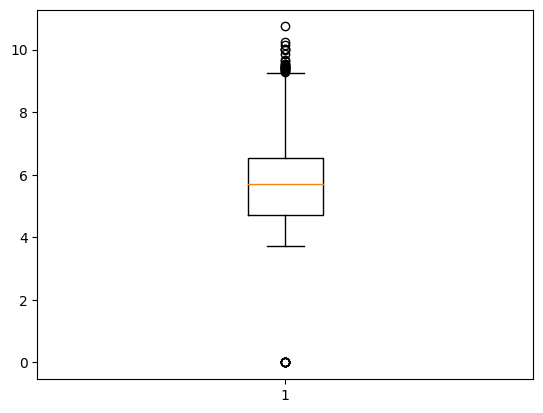

In [4]:
plt.boxplot(data['x'])
plt.show()

In [5]:
data['x'].quantile([0.001,0.01,0.05,0.95,0.99,0.999])

0.001    3.88000
0.010    4.02000
0.050    4.29000
0.950    7.66000
0.990    8.36000
0.999    8.89061
Name: x, dtype: float64

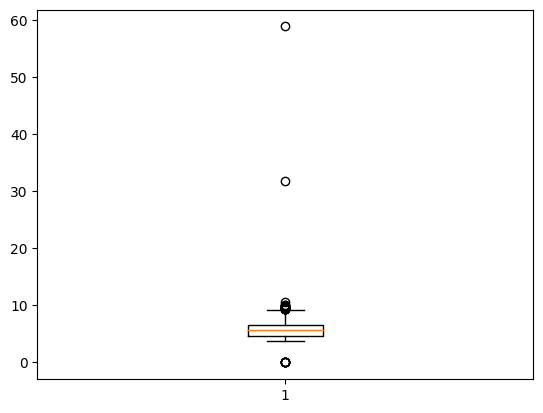

In [6]:
plt.boxplot(data['y'])
plt.show()

In [7]:
data['y'].quantile([0.001,0.01,0.05,0.95,0.99,0.999])

0.001    3.90000
0.010    4.04000
0.050    4.30000
0.950    7.65000
0.990    8.34000
0.999    8.87061
Name: y, dtype: float64

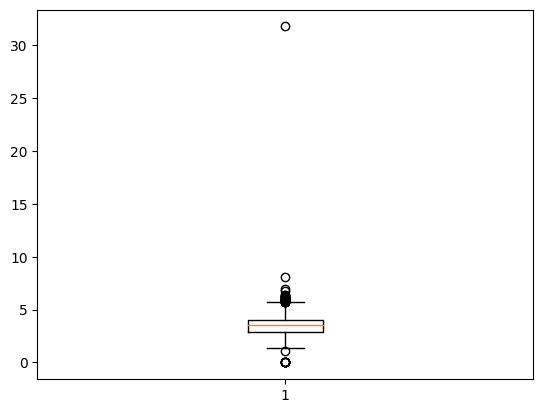

In [8]:
plt.boxplot(data['z'])
plt.show()

In [9]:
data['z'].quantile([0.001,0.01,0.05,0.95,0.99,0.999])

0.001    2.36
0.010    2.48
0.050    2.65
0.950    4.73
0.990    5.15
0.999    5.54
Name: z, dtype: float64

### identifying the index where the x, y, z values are zeros

In [10]:
data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

##### dropping the values and data storing in data2

In [11]:
data2 = data.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

##### columnwise null values

In [12]:
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

### descriptive statistics

In [13]:
data2.describe()

,carat,table,x,y,z,price_new
count,53833.000000,53869.000000,53932.000000,53932.000000,53932.00000,53932.000000
mean,0.798059,57.457564,5.732007,5.735254,3.54016,1966.068039
std,0.474403,2.235315,1.119670,1.140343,0.70260,1994.367418
min,0.200000,43.000000,3.730000,3.680000,1.07000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.91000,474.875000
50%,0.700000,57.000000,5.700000,5.710000,3.53000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.04000,2662.000000
max,5.010000,95.000000,10.740000,58.900000,31.80000,9411.500000


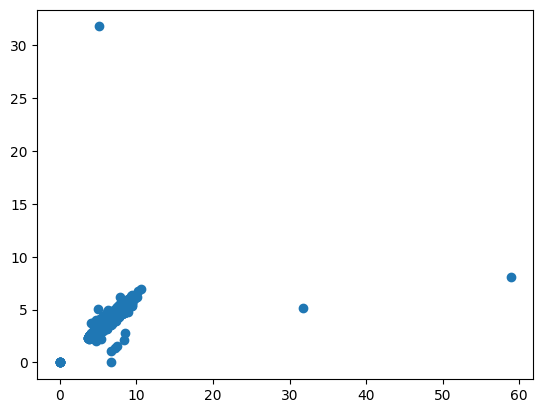

In [14]:
plt.scatter(data['y'],data['z'])
plt.show()

### if x , y, z values are more than 30 , then that is kind of a  outlier

In [15]:
data2[data2['z'] > 30].index

Int64Index([48410], dtype='int64')

In [16]:
data2[data2['y'] > 30].index

Int64Index([24067, 49189], dtype='int64')

##### dropping those data where y, z values are more than 30

In [17]:
data3 = data2.drop([48410,24067,49189])

In [18]:
data3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

### filling the missing values

### distribution of carat

### distribution of table

### distribution of Z

In [19]:
# plt.hist(data['carat'])
# plt.show()

# plt.hist(data['table'])
# plt.show()

# plt.hist(data['z'])
# plt.show()

In [20]:
carat_median = data3['carat'].median()
data3['carat'] = data3['carat'].fillna(carat_median)

table_median = data3['table'].median()
data3['table'] = data3['table'].fillna(table_median)

mode_color = data3['color'].mode()[0]
data3['color'] = data3['color'].fillna(mode_color)

##### again check the missing values columnwise

In [21]:
data3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

##### store the independent features

In [22]:
inp_cols = ['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z']

##### dependent features into y

In [23]:
x = data3[inp_cols]
y = data3['price_new']

In [ ]:
### applying the label encoding on the color column

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [25]:
label_encoder.fit(x['color'])

LabelEncoder()

In [26]:
label_encoder.classes_ = np.array(['J', 'I','H','G','F','E','D'])

In [27]:
x.loc[:,'color'] = label_encoder.transform(x['color'])

<ipython-input-27-f6ce73c63b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'color'] = label_encoder.transform(x['color'])
<ipython-input-27-f6ce73c63b31>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'color'] = label_encoder.transform(x['color'])


### converting the categorical values into one hot encoding

In [28]:
x

,carat,cut,color,clarity,table,x,y,z
0,0.23,Ideal,5,SI2,55.0,3.95,3.98,2.43
1,0.21,Premium,5,SI1,61.0,3.89,3.84,2.31
2,0.23,Good,5,VS1,65.0,4.05,4.07,2.31
3,0.29,Premium,1,VS2,58.0,4.20,4.23,2.63
4,0.31,Good,0,SI2,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,6,SI1,57.0,5.75,5.76,3.50
53936,0.72,Good,6,SI1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,6,SI1,60.0,5.66,5.68,3.56
53938,0.86,Premium,2,SI2,58.0,6.15,6.12,3.74


### one hot encoding on the cut, clarity column

In [29]:
x = pd.get_dummies(x)

In [30]:
x.columns

Index(['carat', 'color', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [31]:
nume_cols = ['carat', 'table', 'x', 'y', 'z']

### splitting the data into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.15,
                                                    random_state=32)

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train.loc[:,nume_cols] = sc.fit_transform(x_train[nume_cols])
x_test.loc[:,nume_cols] = sc.fit_transform(x_test[nume_cols])

In [35]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train.loc[:,nume_cols] = sc.fit_transform(x_train[nume_cols])
# x_test.loc[:,nume_cols] = sc.fit_transform(x_test[nume_cols])

In [ ]:
# x_train

### applying linear regression on the train data and predicting using x_test

In [36]:
from sklearn.linear_model import LinearRegression

In [ ]:
### creating an instance of the linear regression

In [37]:
lr = LinearRegression()

In [ ]:
### training the ML model on the train data

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
### predictin the labels on the test features alone

In [40]:
y_pred = lr.predict(x_test)

### calculating the mean squared error and r squared values

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mean_squared_error(y_test,y_pred)

510397.0190919369

In [ ]:
#calculating the R Squared value for evaluation of the ML model

In [43]:
r2_score(y_test,y_pred)

0.8682183997530262